In [24]:

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml, make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

In [25]:
dados = fetch_openml('mnist_784', as_frame=False)

X, Y = dados.data, dados.target
print(Y)
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:],Y[:60000],Y[60000:]
X_train = X_train.astype("float64")
X_test = X_test.astype("float64")

['5' '0' '4' ... '4' '5' '6']


In [26]:
modelo_svc = make_pipeline(
    StandardScaler(),
    LinearSVC(max_iter = 10000, dual=False, random_state= 60)
)
modelo_svc.fit(X_train,(Y_train == '3'))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(dual=False, max_iter=10000, random_state=60))])

In [27]:
predicoes = modelo_svc.predict(X_test)

Accuracy: 0.9777

Classification Report:
              precision    recall  f1-score   support

       Not 3       0.98      0.99      0.99      8990
           3       0.92      0.86      0.89      1010

    accuracy                           0.98     10000
   macro avg       0.95      0.92      0.94     10000
weighted avg       0.98      0.98      0.98     10000



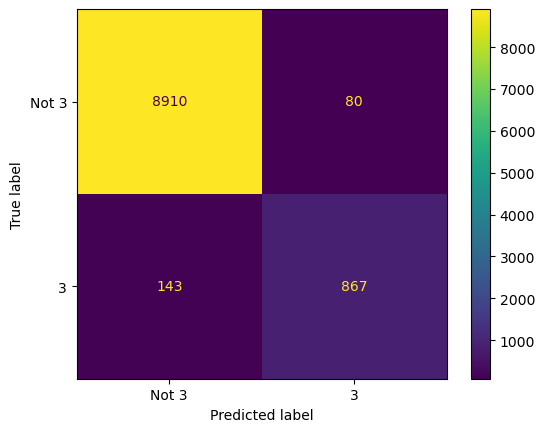

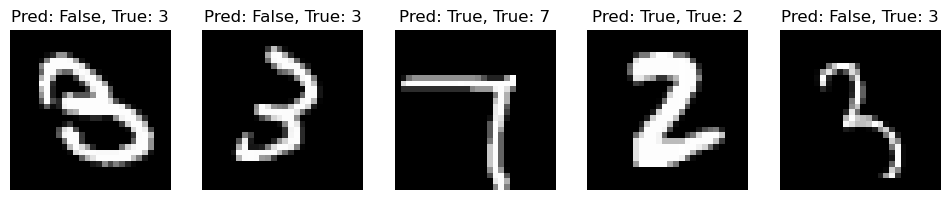

In [28]:
print("Accuracy:", accuracy_score(Y_test == '3', predicoes))
print("\nClassification Report:")
print(classification_report(Y_test == '3', predicoes, target_names=["Not 3", "3"]))

ConfusionMatrixDisplay.from_predictions(Y_test == '3', predicoes, display_labels=["Not 3", "3"])
plt.show()


erro_indices = np.where(predicoes != (Y_test == '3'))[0]
if len(erro_indices) > 0:
    fig, axes = plt.subplots(1, min(5, len(erro_indices)), figsize=(12, 3))
    for ax, idx in zip(axes, erro_indices[:5]):
        ax.imshow(X_test[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {predicoes[idx]}, True: {Y_test[idx]}")
        ax.axis("off")
    plt.show()

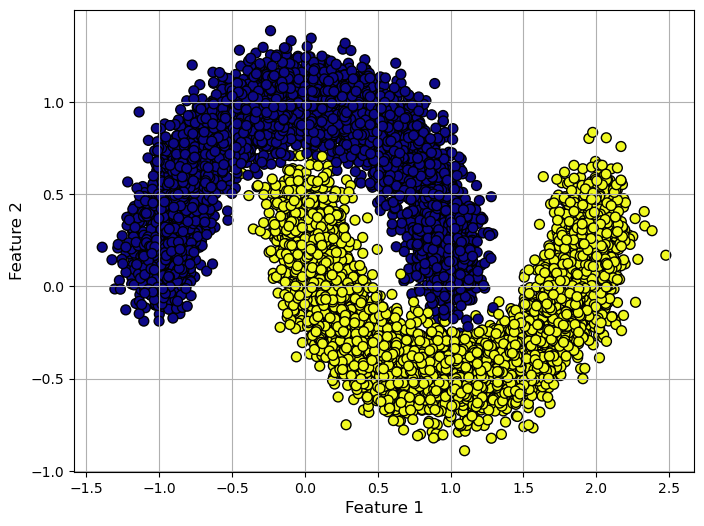

In [29]:
X, Y = make_moons(n_samples = 10000, random_state=60, noise = 0.12)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="plasma", edgecolor="k", s=50)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(True)
plt.show()

In [30]:
poly_svm = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    LinearSVC(random_state=60, dual = False)
)

In [31]:
param_grid = { 'polynomialfeatures__degree': [1, 2, 3, 4, 5]}
grid = GridSearchCV(poly_svm , param_grid = param_grid, cv = 5)
grid.fit(X, Y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('linearsvc',
                                        LinearSVC(dual=False,
                                                  random_state=60))]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5]})

In [32]:
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'polynomialfeatures__degree': 4}
Best score: 0.998


In [33]:
poly_knl_svm = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', degree = 3, coef0 = 1)
)
poly_knl_svm.fit(X,Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(coef0=1, kernel='poly'))])

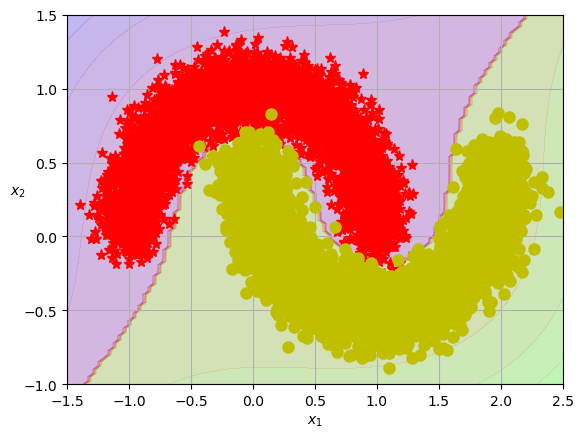

In [34]:

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r*", markersize=8)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "yo", markersize=8)
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_knl_svm, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, Y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [35]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
 SVC(kernel="rbf"))
rbf_kernel_svm_clf.fit(X, Y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

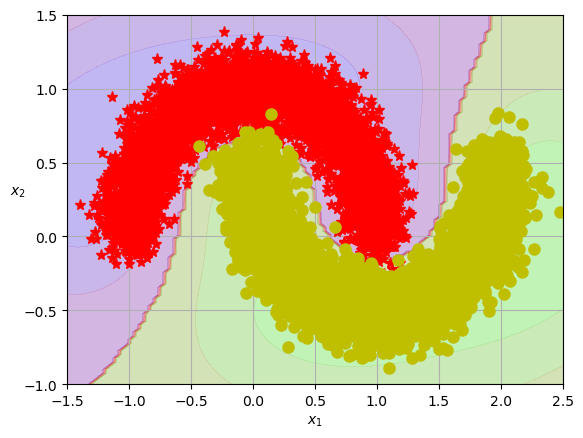

In [36]:

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r*", markersize=8)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "yo", markersize=8)
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, Y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [37]:
modelo_svr = make_pipeline(
    StandardScaler(),
    LinearSVR(random_state= 60, epsilon = 0.5)
)

m = 10000
X = 3 * np.random.rand(m, 1) - 3
Y = 0.3 * X ** 2 + X + 12 + np.random.randn(m, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=60)
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

modelo_svr.fit(X_train,Y_train.ravel())
Y_pred = modelo_svr.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.0333909618483845


C:\Users\marce\anaconda4\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [39]:
modelo_svr_grid = make_pipeline(
    StandardScaler(),
    SVR(kernel='poly', epsilon=0.5)
)

param_grid = {
    'svr__degree': [2, 3, 4, 5]
}

grid_search = GridSearchCV(modelo_svr_grid, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, Y.ravel())

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
X_grid = np.linspace(-10, 10, 1000).reshape(-1, 1)
y_pred = best_model.predict(X_grid)


Best parameters: {'svr__degree': 2}
Best score: -1.0155213343611809
